### Credit Classification

In [79]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
credit_df = pd.read_csv('german.data', names=['checking_account', 
                                              'duration', 
                                              'credit_history', 
                                              'purpose', 
                                              'credit_amount', 
                                              'savings_acc', 
                                              'present_emp_since', 
                                              'inst_rate', 
                                              'personal_status', 
                                              'other_debtors', 
                                              'residing_since', 
                                              'property', 
                                              'age', 
                                              'inst_plans', 
                                              'housing', 
                                              'existing_credits', 
                                              'job', 
                                              'no_of_people_liable', 
                                              'telephone', 
                                              'foreign_worker', 
                                              'status'], sep = ' ')

In [81]:
credit_df.head()

,checking_account,duration,credit_history,purpose,credit_amount,savings_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,existing_credits,job,no_of_people_liable,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [82]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   checking_account     1000 non-null   object
 1   duration             1000 non-null   int64 
 2   credit_history       1000 non-null   object
 3   purpose              1000 non-null   object
 4   credit_amount        1000 non-null   int64 
 5   savings_acc          1000 non-null   object
 6   present_emp_since    1000 non-null   object
 7   inst_rate            1000 non-null   int64 
 8   personal_status      1000 non-null   object
 9   other_debtors        1000 non-null   object
 10  residing_since       1000 non-null   int64 
 11  property             1000 non-null   object
 12  age                  1000 non-null   int64 
 13  inst_plans           1000 non-null   object
 14  housing              1000 non-null   object
 15  existing_credits     1000 non-null   int64 
 16  job    

## Attribute Description

- checking_account (Object)
    - A11 : ...< 0 DM
    - A12 : 0 <= ... < 200 DM
    - A13 : ... >= 200 DM
    - A14 : no checking account

- duration (int64) in months

- credit_history (Object)
    - A30 : no credits taken / all credits paid back duly
    - A31 : all credits at this bank paid back duly
    - A32 : existing credits paid back duly till now
    - A33 : delay in paying off in the past
    - A34 : critical account / other credits existing (not at this bank)

- purpose (Object)
    - A40 : car (new)
    - A41 : car (used)
    - A42 : furniture/equipment
    - A43 : radio/television
	- A44 : domestic appliances
	- A45 : repairs
	- A46 : education
	- A47 : (vacation - does not exist?)
	- A48 : retraining
	- A49 : business
	- A410 : others

- credit_amount (int64)

- saving_acc (Object)
    - A61 :   ... <  100 DM
	- A62 :   100 <= ... <  500 DM
	- A63 :   500 <= ... < 1000 DM
	- A64 :   .. >= 1000 DM
    - A65 :   unknown/ no savings account

- present_emp_since (Object)
    - A71 : unemployed
	- A72 : ... < 1 year
	- A73 : 1  <= ... < 4 years  
	- A74 : 4  <= ... < 7 years
	- A75 : .. >= 7 years

- inst_rate (int64) in percentage

- personal_status (Object)
    - A91 : male   : divorced/separated
	- A92 : female : divorced/separated/married
    - A93 : male   : single
	- A94 : male   : married/widowed
	- A95 : female : single

- other_debtors (Object)
    - A101 : none
	- A102 : co-applicant
	- A103 : guarantor

- residing_since (int64)

- property (Object)
    - A121 : real estate
	- A122 : if not A121 : building society savings agreement / life insurance
    - A123 : if not A121/A122 : car or other, not in attribute 6
	- A124 : unknown / no property

- age (int64)

- inst_plans (Object)
    - A141 : bank
	- A142 : stores
	- A143 : none

- housing (Object)
    - A151 : rent
	- A152 : own
	- A153 : for free

- existing_credits (int64)

- job (Object)
    - A171 : unemployed/ unskilled  - non-resident
	- A172 : unskilled - resident
	- A173 : skilled employee / official
	- A174 : management/ self-employed / highly qualified employee/ officer

- no_of_people_liable (int64)

- telephone (Object)
    - A191 : none
	- A192 : yes, registered under the customers name

- foreign_worker (Object)
    - A201 : yes
	- A202 : no

- Status (int64)
	- 1 : Good
	- 2 : Bad

In [83]:
credit_df.iloc[:5, :7]

,checking_account,duration,credit_history,purpose,credit_amount,savings_acc,present_emp_since
0,A11,6,A34,A43,1169,A65,A75
1,A12,48,A32,A43,5951,A61,A73
2,A14,12,A34,A46,2096,A61,A74
3,A11,42,A32,A42,7882,A61,A74
4,A11,24,A33,A40,4870,A61,A73


In [84]:
credit_df.iloc[:5, 7:]

,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,existing_credits,job,no_of_people_liable,telephone,foreign_worker,status
0,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [85]:
credit_df.status.value_counts()

status
1    700
2    300
Name: count, dtype: int64

In [86]:
credit_df.status = credit_df.status.map({1:0, 2:1})  # 1 -> Good (0), 2 -> Bad (1)
credit_df.status.value_counts()

status
0    700
1    300
Name: count, dtype: int64

In [87]:
# Seperating X_features and Y_features
X_features = list(credit_df.columns)
X_features.remove('status')
X_features

['checking_account',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'other_debtors',
 'residing_since',
 'property',
 'age',
 'inst_plans',
 'housing',
 'existing_credits',
 'job',
 'no_of_people_liable',
 'telephone',
 'foreign_worker']

In [88]:
# Encoding Categorical Features
encoded_credit_df = pd.get_dummies(credit_df[X_features], drop_first=True, dtype=int)

In [89]:
pd.set_option('display.max_columns', None)
encoded_credit_df.head()

,duration,credit_amount,inst_rate,residing_since,age,existing_credits,no_of_people_liable,checking_account_A12,checking_account_A13,checking_account_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_acc_A62,savings_acc_A63,savings_acc_A64,savings_acc_A65,present_emp_since_A72,present_emp_since_A73,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,other_debtors_A102,other_debtors_A103,property_A122,property_A123,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,6,1169,4,4,67,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0


In [90]:
# adding a constant column in X for intercept
import statsmodels.api as sm
X = sm.add_constant(encoded_credit_df)
Y = credit_df.status

In [91]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [92]:
# Building the Logistic Regression Model
import statsmodels.api as sm
logit = sm.Logit(Y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.452608
         Iterations 7


In [93]:
# Printing the model summary
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Method:            MLE       
Dependent Variable:   status            Pseudo R-squared:  0.258     
Date:                 2025-12-07 09:37  AIC:               731.6515  
No. Observations:     700               BIC:               954.6544  
Df Model:             48                Log-Likelihood:    -316.83   
Df Residuals:         651               LL-Null:           -426.75   
Converged:            1.0000            LLR p-value:       7.8045e-24
No. Iterations:       7.0000            Scale:             1.0000    
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                  0.4672   1.2893  0.3624 0.7171 -2.0597  2.9942
duration               0.0198   0.0111  1.7929 0.0730 -0.0018  0.0415
credit_amount          0.0001   0.0001  2.5098 0.0121  0.0000  0.0002
inst_rate              0.3471   0.1056  3.2863 0.0010  0.1401  0.5540
residing_since         0.0218   0.1032  0.2108 0.8331 -0.1806  0.2241
age                   -0.0293   0.0116 -2.5195 0.0118 -0.0521 -0.0065
existing_credits       0.3377   0.2276  1.4834 0.1380 -0.1085  0.7838
no_of_people_liable    0.2143   0.3209  0.6679 0.5042 -0.4146  0.8433
checking_account_A12  -0.2825   0.2641 -1.0696 0.2848 -0.8001  0.2351
checking_account_A13  -0.9467   0.4607 -2.0549 0.0399 -1.8496 -0.0437
checking_account_A14  -1.5046   0.2773 -5.4262 0.0000 -2.0481 -0.9611
credit_history_A31     0.0720   0.6349  0.1135 0.9097 -1.1723  1.3164
credit_history_A32    -0.4420   0.4810 -0.9190 0.3581 -1.3847  0.5007
credit_history_A33    -1.0992   0.5392 -2.0388 0.0415 -2.1559 -0.0425
credit_history_A34    -1.4632   0.4924 -2.9717 0.0030 -2.4283 -0.4982
purpose_A41           -1.6565   0.4361 -3.7989 0.0001 -2.5112 -0.8019
purpose_A410          -0.9521   0.8465 -1.1247 0.2607 -2.6113  0.7071
purpose_A42           -1.0981   0.3263 -3.3655 0.0008 -1.7377 -0.4586
purpose_A43           -1.0147   0.2934 -3.4579 0.0005 -1.5899 -0.4396
purpose_A44           -0.5344   0.7782 -0.6868 0.4922 -2.0596  0.9908
purpose_A45           -0.6317   0.6491 -0.9732 0.3305 -1.9039  0.6405
purpose_A46            0.1820   0.4985  0.3652 0.7150 -0.7950  1.1591
purpose_A48           -2.1140   1.2278 -1.7218 0.0851 -4.5205  0.2924
purpose_A49           -0.5624   0.3994 -1.4080 0.1591 -1.3452  0.2204
savings_acc_A62       -0.3141   0.3444 -0.9119 0.3618 -0.9891  0.3610
savings_acc_A63       -0.6561   0.4837 -1.3564 0.1750 -1.6042  0.2920
savings_acc_A64       -1.0924   0.6149 -1.7765 0.0756 -2.2976  0.1128
savings_acc_A65       -0.6663   0.3003 -2.2188 0.0265 -1.2550 -0.0777
present_emp_since_A72 -0.0647   0.5093 -0.1270 0.8990 -1.0629  0.9336
present_emp_since_A73 -0.1742   0.4848 -0.3593 0.7194 -1.1243  0.7759
present_emp_since_A74 -0.4882   0.5253 -0.9294 0.3527 -1.5178  0.5414
present_emp_since_A75 -0.3425   0.4939 -0.6934 0.4881 -1.3105  0.6256
personal_status_A92   -0.2695   0.5049 -0.5337 0.5936 -1.2591  0.7202
personal_status_A93   -0.7277   0.4983 -1.4605 0.1442 -1.7043  0.2489
personal_status_A94   -0.2190   0.5875 -0.3729 0.7092 -1.3704  0.9323
other_debtors_A102     0.0075   0.4992  0.0149 0.9881 -0.9710  0.9859
other_debtors_A103    -0.7804   0.4757 -1.6405 0.1009 -1.7128  0.1520
property_A122          0.4397   0.3032  1.4500 0.1471 -0.1546  1.0341
property_A123          0.2453   0.2836  0.8650 0.3871 -0.3106  0.8013
property_A124          0.7832   0.5132  1.5262 0.1270 -0.2226  1.7890
inst_plans_A142       -0.0715   0.5403 -0.1322 0.8948 -1.1305  0.9875
inst_plans_A143       -0.5210   0.2902 -1.7952 0.0726 -1.0898  0.0478
housing_A152          -0.4157   0.2906 -1.4307 0.1525 -0.9852  0.1538
housing_A153          -0.2840   0.5827 -0.4875 0.6259 -1.42

In [94]:
# Defining a method get_significant_vars() that takes the model object as an input and 
# returns the list of significant variables after filtering out the variable with corresponding p-value less than 0.05.
# Model Diagnostics and Evaluation
# Following measures are used to validate a logistic regression model:
# 1. Wald's Test (chi-square test, to check the significance of individual predictors)
# 2. Likelihood Ratio Test (to check the overall significance of the model)
# 3. Pseudo R-squared (to check the goodness of fit of the model

def get_significant_vars(lm):
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['p_values', 'vars']
    return list(var_p_vals_df[var_p_vals_df.p_values <= 0.05]['vars'])

In [95]:
significant_vars = get_significant_vars(logit_model)
significant_vars

['credit_amount',
 'inst_rate',
 'age',
 'checking_account_A13',
 'checking_account_A14',
 'credit_history_A33',
 'credit_history_A34',
 'purpose_A41',
 'purpose_A42',
 'purpose_A43',
 'savings_acc_A65']

In [96]:
# Building a logistic regression model with only significant variables
final_logit = sm.Logit(Y_train, sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.494013
         Iterations 6


In [97]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Method:            MLE       
Dependent Variable:  status            Pseudo R-squared:  0.190     
Date:                2025-12-07 09:37  AIC:               715.6189  
No. Observations:    700               BIC:               770.2318  
Df Model:            11                Log-Likelihood:    -345.81   
Df Residuals:        688               LL-Null:           -426.75   
Converged:           1.0000            LLR p-value:       5.4777e-29
No. Iterations:      6.0000            Scale:             1.0000    
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                -0.2405   0.4655 -0.5166 0.6054 -1.1529  0.6720
credit_amount         0.0002   0.0000  4.8839 0.0000  0.0001  0.0002
inst_rate             0.3494   0.0924  3.7790 0.0002  0.1682  0.5306
age                  -0.0261   0.0093 -2.7946 0.0052 -0.0444 -0.0078
checking_account_A13 -0.7374   0.4167 -1.7695 0.0768 -1.5541  0.0794
checking_account_A14 -1.4426   0.2219 -6.5015 0.0000 -1.8775 -1.0077
credit_history_A33   -0.6227   0.3324 -1.8732 0.0610 -1.2743  0.0289
credit_history_A34   -1.0195   0.2402 -4.2436 0.0000 -1.4903 -0.5486
purpose_A41          -1.2663   0.3761 -3.3673 0.0008 -2.0034 -0.5292
purpose_A42          -0.6939   0.2656 -2.6125 0.0090 -1.2145 -0.1733
purpose_A43          -0.9637   0.2360 -4.0839 0.0000 -1.4262 -0.5012
savings_acc_A65      -0.5437   0.2674 -2.0335 0.0420 -1.0678 -0.0197
====================================================================

"""

The negative sign in coefficient value indicates that as the value of this variable increases, the probability of being a bad credit decreases, that is, P(Yi = 1) decreases. A positive sign means that the probability of being a bad credit increases as the corresponding value of the variable increases. Some observations from the model output are:
- The log of odds ratio or probability of being a bad credit increases as credit_amount and inst_rate increases. For example, one unit change in inst_rate results in 0.3494 unit change in log of odds ratio.
- The probability of being a bad credit decreases as age increases. This means that older people tend to pay back their credits ontime compared to younger people.

In [98]:
significant_vars.remove('credit_history_A33')
significant_vars.remove('checking_account_A13')

In [99]:
significant_vars

['credit_amount',
 'inst_rate',
 'age',
 'checking_account_A14',
 'credit_history_A34',
 'purpose_A41',
 'purpose_A42',
 'purpose_A43',
 'savings_acc_A65']

In [100]:
# Building a logistic regression model with only significant variables
final_logit = sm.Logit(Y_train, sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.498867
         Iterations 6


In [101]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Method:            MLE       
Dependent Variable:  status            Pseudo R-squared:  0.182     
Date:                2025-12-07 09:37  AIC:               718.4143  
No. Observations:    700               BIC:               763.9251  
Df Model:            9                 Log-Likelihood:    -349.21   
Df Residuals:        690               LL-Null:           -426.75   
Converged:           1.0000            LLR p-value:       7.7504e-29
No. Iterations:      6.0000            Scale:             1.0000    
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                -0.3258   0.4618 -0.7055 0.4805 -1.2310  0.5794
credit_amount         0.0002   0.0000  4.9301 0.0000  0.0001  0.0002
inst_rate             0.3528   0.0919  3.8396 0.0001  0.1727  0.5329
age                  -0.0275   0.0093 -2.9551 0.0031 -0.0457 -0.0093
checking_account_A14 -1.4242   0.2194 -6.4917 0.0000 -1.8542 -0.9942
credit_history_A34   -0.9414   0.2347 -4.0108 0.0001 -1.4014 -0.4813
purpose_A41          -1.1978   0.3700 -3.2373 0.0012 -1.9230 -0.4726
purpose_A42          -0.6570   0.2619 -2.5091 0.0121 -1.1702 -0.1438
purpose_A43          -0.9710   0.2341 -4.1478 0.0000 -1.4299 -0.5122
savings_acc_A65      -0.5488   0.2652 -2.0694 0.0385 -1.0685 -0.0290
====================================================================

"""

In [102]:
# Predicting on the test data
y_pred_df = pd.DataFrame({
    "actual": Y_test,
    "predicted_prob": final_logit.predict(sm.add_constant(X_test[significant_vars]))
})

y_pred_df.sample(10, random_state=42)

,actual,predicted_prob
557,1,0.129767
798,0,0.095279
977,0,0.447700
136,0,0.176759
575,0,0.055502
544,0,0.060345
332,1,0.841484
917,1,0.659008
678,0,0.223768
363,0,0.088284


In [103]:
''' Iterating through predicted probability of each observation using map() and tagging the observation
as bad credit (1) if probability value is more than 0.5 or as good credit (0) otherwise. '''

y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(10, random_state=42)

,actual,predicted_prob,predicted
557,1,0.129767,0
798,0,0.095279,0
977,0,0.447700,0
136,0,0.176759,0
575,0,0.055502,0
544,0,0.060345,0
332,1,0.841484,1
917,1,0.659008,1
678,0,0.223768,0
363,0,0.088284,0


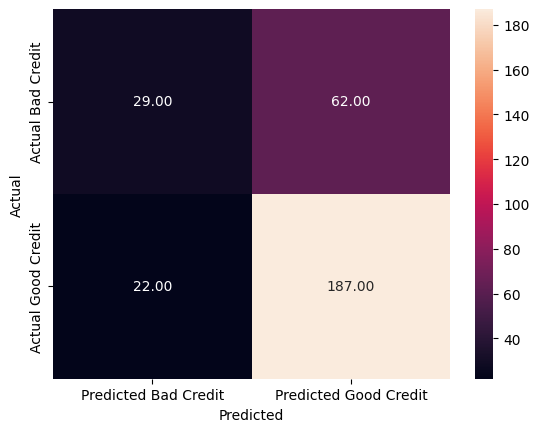

In [104]:
# Creating a confusion matrix
from sklearn import metrics
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, labels = [1, 0])
    sns.heatmap(cm, annot=True, fmt='0.2f', xticklabels=['Predicted Bad Credit', 'Predicted Good Credit'], yticklabels=['Actual Bad Credit', 'Actual Good Credit'])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

draw_cm(y_pred_df.actual, y_pred_df.predicted)

- In the above confusion matrix, the columns represent the predicted labels, while the rows represent the actual label. For example, out of 91 (27 + 64) bad credits, only 29 have been classified correctly as bad credits, and the rest 62 have been classified as good credits when the cut-off probability is 0.5. 

- Each row represents the actual bad credit and good credit observations present in the test dataset and each column represents predicted values of outcome variable. 

1. Left-top quadrant represents actual bad credit and is correctly classified as bad credit. This is called True Positive (TP).
2. Left-down quadrant represents actual good credits and is incorrectly classified as bad credit. This is called False Positive (FP).
3. Right-top quadrant represents actual bad credit and is incorrectly classified as good credit. This is called False Negative (FN).
4. Right-down quadrant represents actual good credits and is correctly classified as good credit. This is called True Negative (TN).

### Measuring Accuracies
In classification, the model performance is often measured using concepts such as sensitivity, specificity, precision, and F-score.

- Sensitivity or Recall (True Positive Rate):- Sensitivity is the conditional probability that the predicted class is positive given that the actual class is positive. Mathematically, sensitivity is given as 

    - Recall = TP / (TP + FN)
    - In simple, out of all actual positives, how many did the model correctly predicted positives.



- Specificity (True Negative Rate):- Specificity is the conditional probability that the predicted class is negative given that the actual class is negative. Mathematically, specificity is given as 

    - Specificity = TN / (TN + FP)



- Precision:- Precision is the conditional probability that the actual value is positive given that the prediction by the model is positive. Mathematically, precision is given by

    - Precision = TP / (TP + FP)
    - In simple, out of all predicted positives, how many were actually positive.



- F-Score:- F-score is a measure that combines precision and recall. Mathematically, it is given as

    - F-score = (2 x Precision x Recall) / (Precision + Recall)

In [105]:
print(metrics.classification_report(y_pred_df.actual, y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82       209
           1       0.57      0.32      0.41        91

    accuracy                           0.72       300
   macro avg       0.66      0.61      0.61       300
weighted avg       0.70      0.72      0.69       300



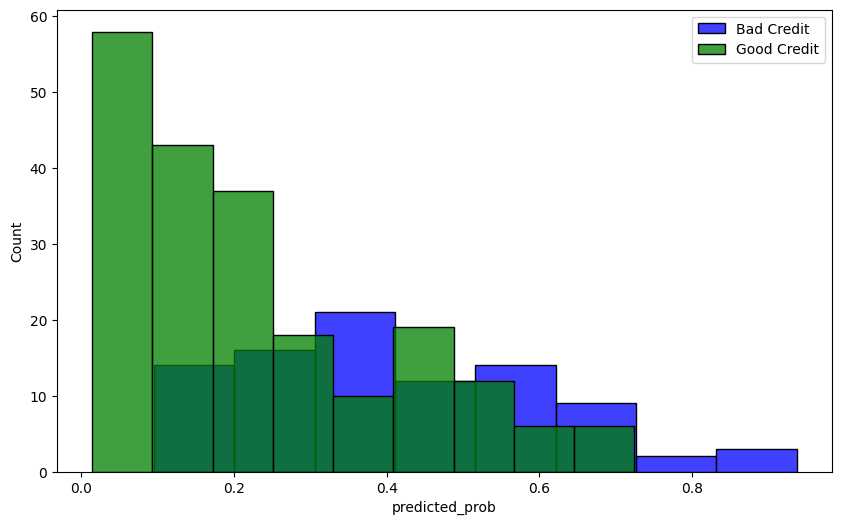

In [106]:
''' Plotting the distributions of predicted probability values for good and bad credits to understand
how well the model can distinguish bad credits and good credits ''' 

plt.figure(figsize=(10,6))
sns.histplot(y_pred_df[y_pred_df.actual==1]['predicted_prob'], kde=False, color='b', label='Bad Credit')
sns.histplot(y_pred_df[y_pred_df.actual==0]['predicted_prob'], kde=False, color='g', label='Good Credit')
plt.legend()
plt.show()

### Receiver Operating Characteristic Curve (ROC Curve)

Receiver operating characteristic (ROC) curve can be used to understand the overall performance
(worth) of a logistic regression model (and, in general, of classification models) and used for model selection. ROC curve is a plot between sensitivity (true positive rate) on the vertical axis and 1 – specificity (false positive rate) on the horizontal axis.

In [107]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or (1 - Specificity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

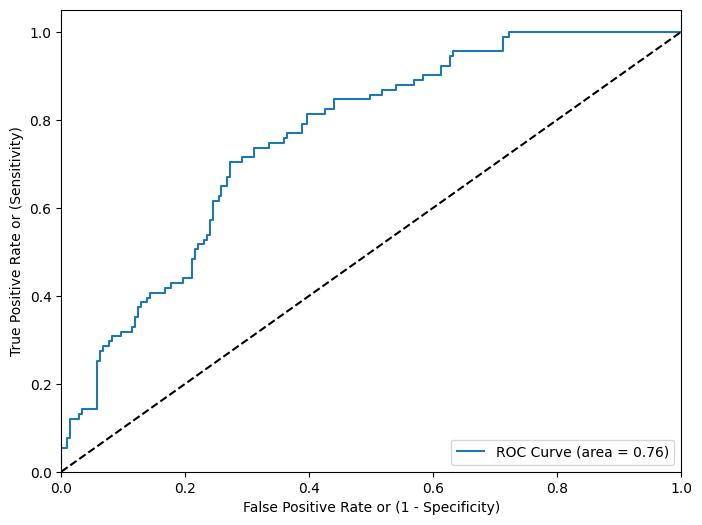

In [108]:
fpr, tpr, thresholds = draw_roc(y_pred_df.actual, y_pred_df.predicted_prob)

- The diagonal line represents the case of not using a model (no discrimination between positive and negative); the area below the diagonal line is equal to 0.5 (it is a right-angle triangle, area
of right-angle triangle is 0.5ab, where a and b are the lengths of the sides which is equal to 1 in this case). Sensitivity and specificity are likely to change when the cut-off probability is changed. The line above the diagonal line captures how sensitivity and (1 - specificity) change when the cut-off probability is changed. Model with higher AUC is preferred and AUC is frequently is used for model selection.

- AUC of at-least 0.7 is required for practical applications of the model. Auc greater than 0.9 implies an outstanding model. Caution should be exercised while selecting models based on AUC, especially when the data is imbalanced (Dataset which has less than 10% positives). In case of imbalanced datasets, the AUC may be very high; however either sensitivity or specificity values may be poor. 

- For this example, the AUC is 0.78, which implies the model is fairly good. The AUC can also be obtained by calling roc_auc_score from sklearn.metrics

In [109]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_pred_df.actual, y_pred_df.predicted_prob)
roc_auc

0.758084021241916

### Finding the Optimal Cut-Off
1. Youden's Index
2. Cost-Based Approach

#### Youden's Index

In [110]:
# Finding the Optimal Cut-off
# 1. Youden's index
# 2. Cost-based approach

# 1. Youden's Index
tpr_fpr = pd.DataFrame({
    'tpr': tpr,
    'fpr': fpr,
    'thresholds': thresholds
})

tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values('diff', ascending=False).head()

,tpr,fpr,thresholds,diff
121,0.703297,0.272727,0.292623,0.430569
122,0.703297,0.277512,0.288654,0.425785
132,0.736264,0.311005,0.262594,0.425259
126,0.714286,0.291866,0.279189,0.422420
123,0.703297,0.282297,0.284118,0.421000


From the above result, the optimal cut-off is 0.29. We can now classify all the observations beyond 0.29 predicted probability as bad credits and others as good credits. We will capture these new classes in predicted_new variable and then draw a new confusion matrix.

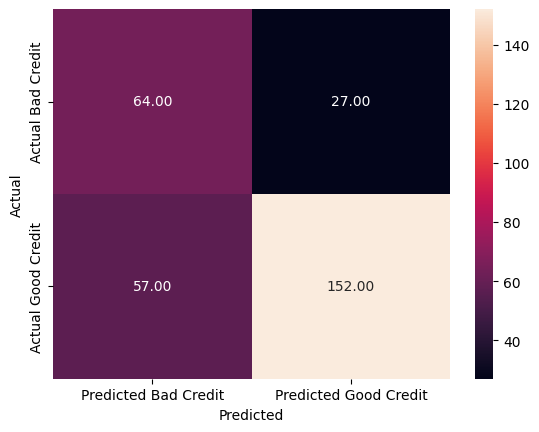

In [111]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.29 else 0)

draw_cm(y_pred_df.actual, y_pred_df.predicted_new)

In [112]:
print(metrics.classification_report(y_pred_df.actual, y_pred_df.predicted_new))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78       209
           1       0.53      0.70      0.60        91

    accuracy                           0.72       300
   macro avg       0.69      0.72      0.69       300
weighted avg       0.75      0.72      0.73       300



With cut-off probability of 0.29, the model is able to classify the bad credits better and the F1-score for bad credits (Y = 1) has also improved to 0.60.

#### Cost-Based Approach

As the cost of false negatives and false positives is not same, the optimal classification cut-off probability can also be determined using cost-based approach, which finds the cut-off where the total cost is minimum. In the cost-based approach, we assign penalty cost for misclassification of positives and negatives and find the total cost for a cut-off probability.

Assuming cost of a false positive is C1 and that of a false negative is C2, total cost will be

Total cost = FN × C1 + FP × C2

The optimal cut-off probability is the one which minimizes the total penalty cost. We will write a method get_total_cost() to return the penalty cost for a specific cut-off probability. The method also takes the relative cost of false negatives and false positives. The function will take actual and predicted values, find the number of false positives (FPs) and false negatives (FNs), and return the total cost.

In [113]:
def get_total_cost(actual, predicted, cost_FPs, cost_FNs):
    cm = metrics.confusion_matrix(actual, predicted, labels=[1, 0])
    cm_mat = np.array(cm)
    return cm_mat[0, 1] * cost_FNs + cm_mat[1, 0] * cost_FPs

Create a DataFrame which will capture the cost against different cut-off probability values.

In [114]:
cost_df = pd.DataFrame(columns=['prob', 'cost'])

Let us assume that false negatives (predicting a bad credit to be a good credit) are five times costilier that false positives. (predicting a good credit to be a bad credit). Deciding the costs will require domain knowledge.

We can calculate the penalty cost for each cut-off probability values between 0.1 and 0.5 with incremental values of 0.01 and sort the costs in ascending order to find the cut-off probability at which the penalty cost is minimum.

In [115]:
idx = 0
for each_prob in range(10, 50):
    cost = get_total_cost(y_pred_df.actual, 
                          y_pred_df.predicted_prob.map(
                              lambda x: 1 if x > (each_prob/100) else 0), 1, 5)
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1


cost_df.sort_values('cost', ascending = True )[0:5]

,prob,cost
2,0.12,158.0
0,0.10,159.0
3,0.13,161.0
1,0.11,166.0
10,0.20,166.0


The lowest cost is achieved at cut-off probability of 0.12 if false negatives are assumed to be five times costlier than false positives. So, let us predict everything beyond 0.12 as bad credit and below 0.12 as good credit.

In [116]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.12 else 0)

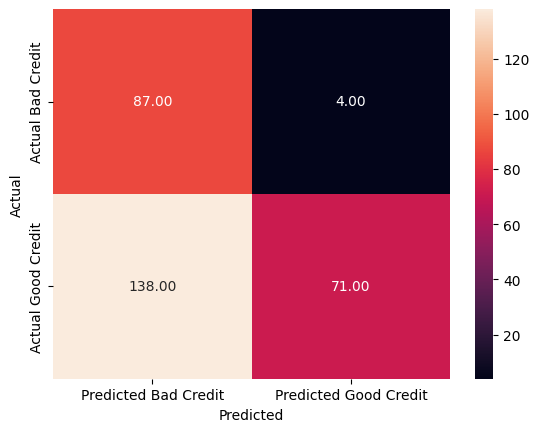

In [117]:
draw_cm(y_pred_df.actual, y_pred_df.predicted_using_cost)

As shown above, the model has reduced the false negatives to only 4. This is because of high cost false negatives (5 times) compared to false positives. The number of false positives have increased to 138.